# Loading DF 

In [2]:
#from dash import Dash, html, dcc, Input, Output
#import dash_cytoscape as cyto

import networkx as nx

import numpy as np
import pandas as pd
import yaml
import os

with open(os.path.join('data', 'pokemon-forms.yaml'), 'r') as file:
    data = yaml.safe_load(file)

pokemon_forms = pd.DataFrame(data).T


In [3]:
stats = pd.DataFrame()
for row in pokemon_forms.index:
    new_line = pd.DataFrame(list(pokemon_forms.loc[row, "stats"].values()), 
                        index=pokemon_forms.loc[row, "stats"].keys(), 
                        columns=[row]).T
    stats = pd.concat([stats, new_line])
    

In [4]:
pokemon_forms = pokemon_forms.drop(columns=["stats", "release", "pokemonid", "formid", "gender", "ev-yield"])

In [5]:
pokemon_forms.head()

,formname,gen,type1,type2,species,height,weight,catch-rate,base-exp,egg-cycles,friendship,growth-rate
bulbasaur,None,1,grass,poison,Seed,0.7,6.9,45,64,20,50,medium slow
ivysaur,None,1,grass,poison,Seed,1,13,45,142,20,50,medium slow
venusaur,None,1,grass,poison,Seed,2,100,45,236,20,50,medium slow
venusaur-mega,Mega Venusaur,6,grass,poison,Seed,2.4,155.5,45,281,20,50,medium slow
charmander,None,1,fire,None,Lizard,0.6,8.5,45,62,20,50,medium slow


In [6]:

pokemon_forms_dummies = pd.get_dummies(pokemon_forms, columns=['type1', 'type2'], prefix="", prefix_sep='')
pokemon_forms_dummies = pd.get_dummies(pokemon_forms, columns=["species"])


pok_growth_rate = {'medium slow' : 2, 'medium fast' : 4, 'fast' : 5, 'slow' : 1, 'fluctuating' : 3,
       'erratic': 0}
pokemon_forms_dummies["growth-rate"] = pokemon_forms_dummies["growth-rate"].map(pok_growth_rate)
pokemon_forms_dummies = pokemon_forms_dummies.drop(columns=["type1", "type2", "formname"])

pokemon_forms_dummies

,gen,height,weight,catch-rate,base-exp,egg-cycles,friendship,growth-rate,species_Abundance,species_Acorn,...,species_Wood Gecko,species_Woodear,species_Woodpecker,species_Wool,species_Woolly Crab,species_Worm,species_Wrestling,species_Wushu,species_Young Fowl,species_Zen Charm
bulbasaur,1,0.7,6.9,45,64,20,50,2,False,False,...,False,False,False,False,False,False,False,False,False,False
ivysaur,1,1,13,45,142,20,50,2,False,False,...,False,False,False,False,False,False,False,False,False,False
venusaur,1,2,100,45,236,20,50,2,False,False,...,False,False,False,False,False,False,False,False,False,False
venusaur-mega,6,2.4,155.5,45,281,20,50,2,False,False,...,False,False,False,False,False,False,False,False,False,False
charmander,1,0.6,8.5,45,62,20,50,2,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iron-crown,9,1.6,156,10,None,None,None,1,False,False,...,False,False,False,False,False,False,False,False,False,False
terapagos-normal,9,0.2,6.5,255,None,None,None,1,False,False,...,False,False,False,False,False,False,False,False,False,False
terapagos-terastal,9,0.3,16,255,None,None,None,1,False,False,...,False,False,False,False,False,False,False,False,False,False
terapagos-stellar,9,1.7,77,255,None,None,None,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
print(pokemon_forms_dummies.info())
pokemon_forms_dummies.dropna(axis = 0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, bulbasaur to pecharunt
Columns: 740 entries, gen to species_Zen Charm
dtypes: bool(732), int64(1), object(7)
memory usage: 986.3+ KB
None


In [8]:
from sklearn.decomposition import PCA
poke_pca = PCA(n_components=5, random_state=42)
pca_res = poke_pca.fit_transform(pokemon_forms_dummies)
PCA_res = pd.DataFrame(pca_res, index=pokemon_forms_dummies.index)

In [9]:
PCA_res

,0,1,2,3,4
bulbasaur,-83.366821,-4.097217,-92.890430,8.288207,0.687570
ivysaur,-46.852754,-47.798706,-40.892893,-4.613990,-2.118142
venusaur,65.931214,-61.301298,14.625075,-25.093115,-3.383442
venusaur-mega,131.895709,-60.962685,39.977299,-35.732345,-3.696882
charmander,-82.787031,-2.113073,-94.381579,8.510284,0.806724
...,...,...,...,...,...
chi-yu,20.040532,-163.397643,31.713406,17.417174,-45.246166
roaring-moon,346.822173,17.561620,7.696273,-7.414667,-35.636376
iron-valiant,48.914830,-152.074212,38.653911,13.943236,-44.812423
koraidon,298.335392,-48.641282,36.474150,-9.059980,-39.243520


In [10]:
print("variance expliquée: ", poke_pca.explained_variance_ratio_)
print("somme des variances:", sum(poke_pca.explained_variance_ratio_))

variance expliquée:  [0.67796181 0.23567947 0.05958516 0.01814025 0.00831871]
somme des variances: 0.9996854028272987


In [11]:
import plotly.express as px 

px.scatter(PCA_res, x= 0, y=1, color=3, hover_name=PCA_res.index)

# Clustering ? 

Text(0, 0.5, 'Inertia')

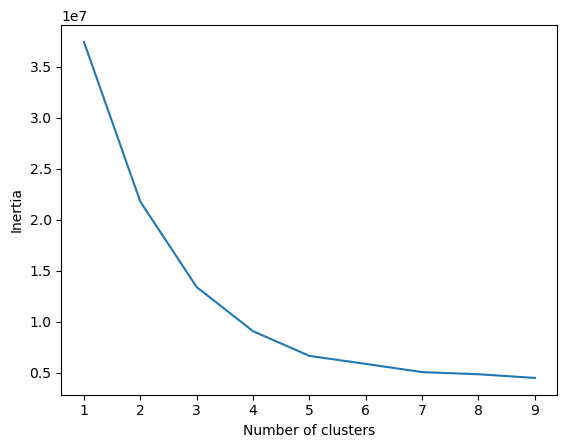

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []
for i in range(1,10): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_res)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel("Number of clusters")
plt.ylabel('Inertia')

In [15]:
PCA_res

,0,1,2,3,4
bulbasaur,-83.366821,-4.097217,-92.890430,8.288207,0.687570
ivysaur,-46.852754,-47.798706,-40.892893,-4.613990,-2.118142
venusaur,65.931214,-61.301298,14.625075,-25.093115,-3.383442
venusaur-mega,131.895709,-60.962685,39.977299,-35.732345,-3.696882
charmander,-82.787031,-2.113073,-94.381579,8.510284,0.806724
...,...,...,...,...,...
chi-yu,20.040532,-163.397643,31.713406,17.417174,-45.246166
roaring-moon,346.822173,17.561620,7.696273,-7.414667,-35.636376
iron-valiant,48.914830,-152.074212,38.653911,13.943236,-44.812423
koraidon,298.335392,-48.641282,36.474150,-9.059980,-39.243520


In [16]:
kmeans  = KMeans(n_clusters=3, random_state=0)

kmeans.fit(pokemon_forms_dummies)

predict_cluster_indexes = kmeans.predict(pokemon_forms_dummies)

In [17]:
poke_cluster = PCA_res.merge(pd.DataFrame(predict_cluster_indexes, index=PCA_res.index, columns=["label"]), left_index=True, right_index=True)

In [19]:
poke_cluster

,0,1,2,3,4,label
bulbasaur,-83.366821,-4.097217,-92.890430,8.288207,0.687570,0
ivysaur,-46.852754,-47.798706,-40.892893,-4.613990,-2.118142,0
venusaur,65.931214,-61.301298,14.625075,-25.093115,-3.383442,0
venusaur-mega,131.895709,-60.962685,39.977299,-35.732345,-3.696882,0
charmander,-82.787031,-2.113073,-94.381579,8.510284,0.806724,0
...,...,...,...,...,...,...
chi-yu,20.040532,-163.397643,31.713406,17.417174,-45.246166,0
roaring-moon,346.822173,17.561620,7.696273,-7.414667,-35.636376,1
iron-valiant,48.914830,-152.074212,38.653911,13.943236,-44.812423,0
koraidon,298.335392,-48.641282,36.474150,-9.059980,-39.243520,1


In [20]:
px.scatter(poke_cluster, x=0, y=2, color=poke_cluster["label"], hover_name=poke_cluster.index)